# 개요: 전체적인 flow 1 SMOTE + SVM
1. feature selection--- 한국은행 + Atman 총 11개 변수가 선택됨
2. Oversampling ----- SMOTE
3. Modeling ---------- SVM



In [166]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

In [63]:
# df_full feature selection과 padding 완료된 데이터
df_full = pd.read_csv(r'..\..\..\Data\데이터정리중\재무변수_한국은행_Altman.csv', index_col=0)
df = df_full
df_ = pd.read_csv(r'..\..\..\Data\Dataset.csv',index_col=0)
final = pd.read_csv(r'..\..\..\Data\최종데이터셋\Finaldataset.csv')


In [267]:
last = pd.read_csv(r'..\..\..\Data\최종데이터셋\Finaldataset_ver3.csv',index_col=0)

In [268]:
last

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,...,key,부도,공시발생일,text,link,TS,폐지사유,폐지사유요약,정기공시제목,수시공시제목
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,0.00,0.019074,179.37,131.99,...,588202001,1.0,0,0,0,0,0,0,0,0
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,0.00,0.023517,179.37,131.99,...,588202002,1.0,0,0,0,0,0,0,0,0
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,0.00,0.043081,133.37,132.37,...,588202003,1.0,0,0,0,0,0,0,0,0
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,0.00,0.058531,131.30,71.46,...,588202004,1.0,0,0,0,0,0,0,0,0
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,0.00,0.047346,52.25,101.56,...,588202005,1.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27148,흥구석유(주),24060.0,2016/12,5.0,0,UQ,2.10,0.012651,4611.84,5.19,...,240602017,1.0,0,0,0,0,0,0,0,0
27149,흥구석유(주),24060.0,2017/12,5.0,0,UQ,2.08,0.012502,4650.29,12.83,...,240602018,1.0,0,0,0,0,0,0,0,0
27150,흥구석유(주),24060.0,2018/12,5.0,0,UQ,2.48,0.018056,4696.15,5.40,...,240602019,1.0,0,0,0,0,0,0,0,0
27151,흥구석유(주),24060.0,2019/12,5.0,0,UQ,2.83,0.000300,5133.42,6.05,...,240602020,1.0,0,0,0,0,0,0,0,0


In [275]:
coll = [ '자기자본배당률',
       '금융비용 대 부채비율', '자기자본배율', '유동부채비율', '매입채무회전률', '유동자산회전률', '총자본투자효율',
       '순운전자본비율', '누적수익성비율', '총자산영업이익률', '총자산회전율']

In [274]:
last.columns

Index(['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '자기자본배당률',
       '금융비용 대 부채비율', '자기자본배율', '유동부채비율', '매입채무회전률', '유동자산회전률', '총자본투자효율',
       '순운전자본비율', '누적수익성비율', '총자산영업이익률', '총자산회전율', '년', 'key', '부도', '공시발생일',
       'text', 'link', 'TS', '폐지사유', '폐지사유요약', '정기공시제목', '수시공시제목'],
      dtype='object')

In [ ]:
last.drop(col)

In [277]:
last[coll].corr()

,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,매입채무회전률,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율
자기자본배당률,1.000000,-0.021447,-0.000668,-0.003489,0.000192,0.008310,0.011204,0.020762,0.022182,0.015594,0.017918
금융비용 대 부채비율,-0.021447,1.000000,-0.003765,0.027841,-0.006335,-0.048789,-0.097862,-0.166782,-0.250091,-0.116517,-0.099816
자기자본배율,-0.000668,-0.003765,1.000000,-0.002179,0.000086,-0.018875,-0.005249,0.027785,-0.011715,-0.006914,-0.020442
유동부채비율,-0.003489,0.027841,-0.002179,1.000000,-0.001882,0.011474,-0.024845,-0.081530,-0.042579,-0.036136,0.012552
매입채무회전률,0.000192,-0.006335,0.000086,-0.001882,1.000000,0.062386,0.004730,0.002453,0.004881,0.004075,0.025246
유동자산회전률,0.008310,-0.048789,-0.018875,0.011474,0.062386,1.000000,0.113756,-0.221806,0.098065,0.103810,0.612283
총자본투자효율,0.011204,-0.097862,-0.005249,-0.024845,0.004730,0.113756,1.000000,0.368788,0.588801,0.590551,0.066309
순운전자본비율,0.020762,-0.166782,0.027785,-0.081530,0.002453,-0.221806,0.368788,1.000000,0.516758,0.291977,-0.064938
누적수익성비율,0.022182,-0.250091,-0.011715,-0.042579,0.004881,0.098065,0.588801,0.516758,1.000000,0.614524,0.034663
총자산영업이익률,0.015594,-0.116517,-0.006914,-0.036136,0.004075,0.103810,0.590551,0.291977,0.614524,1.000000,0.057763


<AxesSubplot:>

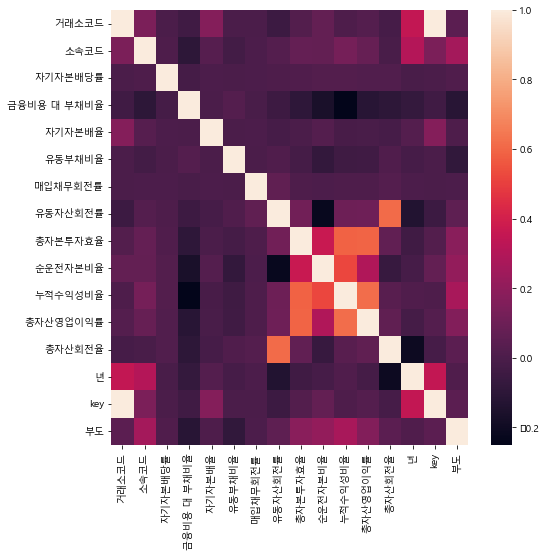

In [271]:
import seaborn as sns
sns.heatmap(last.corr())

In [140]:
df_full

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,...,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율,년,key,공시제목,부도
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,0.00,0.019074,179.37,131.99,...,0.97,8.76,22.76,0.189100,0.052949,1.761228,2001.0,588202001,0,1.0
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,0.00,0.023517,179.37,131.99,...,0.97,8.76,22.76,0.005261,0.014062,0.756792,2002.0,588202002,0,1.0
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,0.00,0.043081,133.37,132.37,...,2.01,0.79,7.98,-0.139212,-0.247841,1.713785,2003.0,588202003,0,1.0
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,0.00,0.058531,131.30,71.46,...,1.89,16.80,35.58,-0.203019,-0.082618,1.571816,2004.0,588202004,0,1.0
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,0.00,0.047346,52.25,101.56,...,2.11,-37.94,24.97,-1.181502,-0.547982,2.526356,2005.0,588202005,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.0,2016/12,5.0,0,UQ,2.10,0.012651,4611.84,5.19,...,10.07,8.84,14.15,0.414800,0.012181,1.817620,2017.0,240602017,0,1.0
27353,흥구석유(주),24060.0,2017/12,5.0,0,UQ,2.08,0.012502,4650.29,12.83,...,10.14,8.80,8.68,0.417422,0.009398,1.946103,2018.0,240602018,0,1.0
27354,흥구석유(주),24060.0,2018/12,5.0,0,UQ,2.48,0.018056,4696.15,5.40,...,11.71,9.80,11.59,0.453302,0.014520,2.210036,2019.0,240602019,0,1.0
27355,흥구석유(주),24060.0,2019/12,5.0,0,UQ,2.83,0.000300,5133.42,6.05,...,8.58,18.02,21.47,0.485889,0.005988,1.800947,2020.0,240602020,0,1.0


In [141]:
27357 -27294 

63

In [153]:
final.columns

Index(['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '자기자본배당률',
       '금융비용 대 부채비율', '자기자본배율', '유동부채비율', '매입채무회전률', '유동자산회전률', '총자본투자효율',
       '순운전자본비율', '누적수익성비율', '총자산영업이익률', '총자산회전율', '년', 'key', '공시제목_x', '부도',
       '공시발생일', '공시제목_y', 'text', 'link', 'TS', '폐지사유', '폐지사유요약'],
      dtype='object')

In [21]:
# # 앞 뒤에 붙은 object 변수 리스트 처리
# col_object = ['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '년', 'key', '공시제목', '부도']
# col_head = ['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드']
# col_tail = ['년', 'key', '공시제목', '부도']

In [154]:
# 앞 뒤에 붙은 object 변수 리스트 처리
col_object = ['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드', '년', 'key', '공시제목_x', '부도',
       '공시발생일', '공시제목_y', 'text', 'link', 'TS', '폐지사유', '폐지사유요약']
col_head = ['회사명', '거래소코드', '회계년도', '소속코드', '상장폐지일', '감사의견코드']
col_tail = ['년', 'key', '공시제목', '부도', '공시발생일', '공시제목_y', 'text', 'link', 'TS', '폐지사유', '폐지사유요약']

In [209]:
X = final.drop(columns = col_object)
y = final['부도']
print(X.shape)
print(y.shape)

(27294, 11)
(27294,)


In [157]:
X

,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,매입채무회전률,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율
0,0.00,0.019074,179.37,131.99,24.84,0.97,8.76,22.76,0.189100,0.052949,1.761228
1,0.00,0.023517,179.37,131.99,24.84,0.97,8.76,22.76,0.005261,0.014062,0.756792
2,0.00,0.043081,133.37,132.37,58.88,2.01,0.79,7.98,-0.139212,-0.247841,1.713785
3,0.00,0.058531,131.30,71.46,26.59,1.89,16.80,35.58,-0.203019,-0.082618,1.571816
4,0.00,0.047346,52.25,101.56,24.16,2.11,-37.94,24.97,-1.181502,-0.547982,2.526356
...,...,...,...,...,...,...,...,...,...,...,...
27289,2.10,0.012651,4611.84,5.19,179576.67,10.07,8.84,14.15,0.414800,0.012181,1.817620
27290,2.08,0.012502,4650.29,12.83,5044.25,10.14,8.80,8.68,0.417422,0.009398,1.946103
27291,2.48,0.018056,4696.15,5.40,5128.70,11.71,9.80,11.59,0.453302,0.014520,2.210036
27292,2.83,0.000300,5133.42,6.05,23497.93,8.58,18.02,21.47,0.485889,0.005988,1.800947


## SMOTE Oversampling

In [210]:
# 부도 칼럼을 기준으로 오버샘플링
sm = SMOTE() #k_neighbors , random_state

X_resample, y_resample = sm.fit_resample(X, y)

print('Before OverSampling, the shape of X: {}'.format(X.shape))
print('Before OverSampling, the shape of y: {}'.format(y.shape))
print(y.value_counts())
print('After OverSampling, the shape of X: {}'.format(X_resample.shape))
print('After OverSampling, the shape of y: {}'.format(y_resample.shape))
print(y_resample.value_counts())

Before OverSampling, the shape of X: (27294, 11)
Before OverSampling, the shape of y: (27294,)
1.0    26841
0.0      453
Name: 부도, dtype: int64
After OverSampling, the shape of X: (53682, 11)
After OverSampling, the shape of y: (53682,)
1.0    26841
0.0    26841
Name: 부도, dtype: int64


Text(0.5, 1.0, 'oversampling 후')

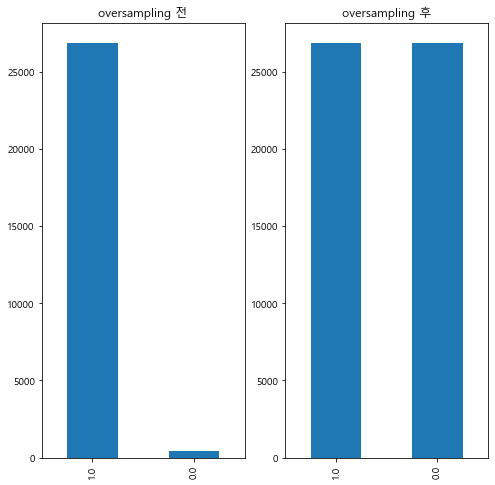

In [211]:
plt.subplot(1,2,1)
y.value_counts().plot(kind='bar')
plt.title('oversampling 전')

plt.subplot(1,2,2)
y_resample.value_counts().plot(kind='bar')
plt.title('oversampling 후')

In [224]:
X_resample = X_resample.drop(columns=['부도'])

In [226]:
X_resample

,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,매입채무회전률,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율
0,0.000000,0.019074,179.370000,131.990000,24.840000,0.970000,8.760000,22.760000,0.189100,0.052949,1.761228
1,0.000000,0.023517,179.370000,131.990000,24.840000,0.970000,8.760000,22.760000,0.005261,0.014062,0.756792
2,0.000000,0.043081,133.370000,132.370000,58.880000,2.010000,0.790000,7.980000,-0.139212,-0.247841,1.713785
3,0.000000,0.058531,131.300000,71.460000,26.590000,1.890000,16.800000,35.580000,-0.203019,-0.082618,1.571816
4,0.000000,0.047346,52.250000,101.560000,24.160000,2.110000,-37.940000,24.970000,-1.181502,-0.547982,2.526356
...,...,...,...,...,...,...,...,...,...,...,...
53677,0.000000,0.027043,441.310000,486.590000,4.800000,1.510000,-31.870000,-21.490000,-0.067085,-0.103632,1.087887
53678,0.000000,0.033387,50.260983,164.639836,12.414932,2.393861,-58.468894,-9.577096,-1.080292,-0.274333,1.232275
53679,0.000000,0.048563,515.269572,96.100317,5.465254,0.908916,-13.915334,-27.997946,-0.189089,-0.247416,0.372127
53680,0.805501,0.046106,633.114011,66.186633,13.671686,2.807652,16.616018,10.652607,0.135924,0.084595,0.927329


In [225]:
y_resample

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
53677    0.0
53678    0.0
53679    0.0
53680    0.0
53681    0.0
Name: 부도, Length: 53682, dtype: float64

In [212]:
df_new = X_resample
df_new['부도'] = y_resample
df_new

,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,매입채무회전률,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율,부도
0,0.000000,0.019074,179.370000,131.990000,24.840000,0.970000,8.760000,22.760000,0.189100,0.052949,1.761228,1.0
1,0.000000,0.023517,179.370000,131.990000,24.840000,0.970000,8.760000,22.760000,0.005261,0.014062,0.756792,1.0
2,0.000000,0.043081,133.370000,132.370000,58.880000,2.010000,0.790000,7.980000,-0.139212,-0.247841,1.713785,1.0
3,0.000000,0.058531,131.300000,71.460000,26.590000,1.890000,16.800000,35.580000,-0.203019,-0.082618,1.571816,1.0
4,0.000000,0.047346,52.250000,101.560000,24.160000,2.110000,-37.940000,24.970000,-1.181502,-0.547982,2.526356,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
53677,0.000000,0.027043,441.310000,486.590000,4.800000,1.510000,-31.870000,-21.490000,-0.067085,-0.103632,1.087887,0.0
53678,0.000000,0.033387,50.260983,164.639836,12.414932,2.393861,-58.468894,-9.577096,-1.080292,-0.274333,1.232275,0.0
53679,0.000000,0.048563,515.269572,96.100317,5.465254,0.908916,-13.915334,-27.997946,-0.189089,-0.247416,0.372127,0.0
53680,0.805501,0.046106,633.114011,66.186633,13.671686,2.807652,16.616018,10.652607,0.135924,0.084595,0.927329,0.0


In [213]:
df_new['부도'].value_counts()

1.0    26841
0.0    26841
Name: 부도, dtype: int64

In [214]:
bankrupt_0 = df_new.loc[df_new['부도'] == 0].drop(columns=['부도'])
bankrupt_1 = df_new.loc[df_new['부도'] == 1].drop(columns=['부도'])

In [215]:
#t-test진행
stats.ttest_ind(bankrupt_0, bankrupt_1)[1] <0.05

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

## Modeling

### Random Forest

In [247]:
37577+16105

53682

In [249]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, 
                                                    stratify=y_resample, test_size=0.3)


print("Train set: ")
print(X_train.shape)
print(X_test.shape)
print("===========")
print("Test set: ")
print(y_train.shape)
print(y_test.shape)

rf_clf=RandomForestClassifier(n_estimators=300, criterion='gini' ,max_depth=10,min_samples_split=2
                           ,bootstrap=True, oob_score= True, max_features = 'auto', random_state=3,
                           max_leaf_nodes= 10)

rf_clf.fit(X_train, y_train)
pred=rf_clf.predict_log_proba(X_train)

#print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_val_pred)}")

Train set: 
(37577, 11)
(16105, 11)
Test set: 
(37577,)
(16105,)


In [257]:
print(f"RF_loss: {log_loss(y_train, pred)}")

RF_loss: 0.6931471805599453


In [260]:
rf_clf.fit(X_train, y_train).score(X_test, y_test)

0.8689226948152747

In [250]:
pred

array([[-0.67920802, -0.70728339],
       [-1.38594695, -0.2877979 ],
       [-2.79774033, -0.06288403],
       ...,
       [-0.27939184, -1.41158559],
       [-0.1158823 , -2.21256195],
       [-2.80040329, -0.06271144]])

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


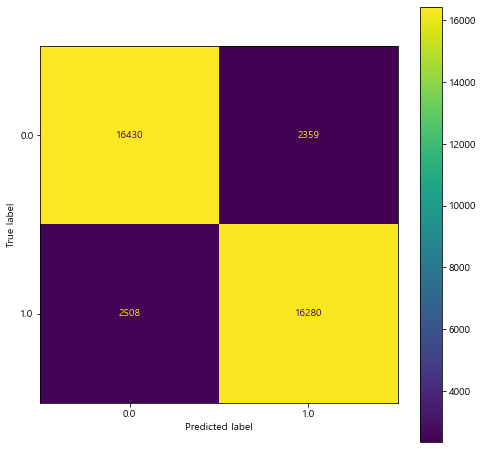

In [233]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(rf_clf, X_train, y_train)
plt.show()

In [261]:
print("f1_score: {:.3f}".format(f1_score(y, lsvc.predict(X), average='macro')))

f1_score: 0.517


In [263]:
pred.shape

(37577, 2)

In [264]:
pred

array([[-0.67920802, -0.70728339],
       [-1.38594695, -0.2877979 ],
       [-2.79774033, -0.06288403],
       ...,
       [-0.27939184, -1.41158559],
       [-0.1158823 , -2.21256195],
       [-2.80040329, -0.06271144]])

In [262]:

print("roc_auc_score: {:.3f}".format(roc_auc_score(X_test, pred)))

ValueError: continuous-multioutput format is not supported

In [ ]:
"""나중에 k-fold까지 진행하기

from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(cat_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        cat_clf.fit(X_train, y_train)
        
        predictions=cat_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=cat_clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(cat_clf)

"""

### SVM

In [234]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from tqdm import tqdm
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'malgun gothic'
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix

In [243]:
LinearSVC(C=1, penalty="l1", dual=False).fit(X_resample, y_resample)
lsvc = LinearSVC(C=1, penalty="l1", dual=False).fit(X_resample, y_resample)
print("훈련 세트 정확도: {:.3f}".format(lsvc.score(X_resample, y_resample)))
print("f1_score: {:.3f}".format(f1_score(y_resample, lsvc.predict(X_resample), average='macro')))
print("roc_auc_score: {:.3f}".format(roc_auc_score(y_resample, lsvc.predict(X_resample))))

훈련 세트 정확도: 0.829
f1_score: 0.829
roc_auc_score: 0.829


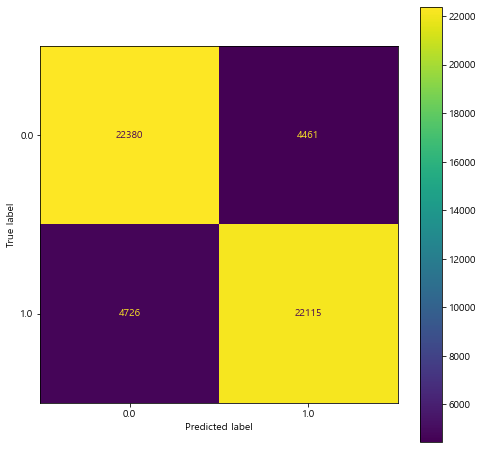

In [242]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score, log_loss, plot_confusion_matrix
plt.rcParams['figure.figsize'] = (8,8)
plot_confusion_matrix(lsvc, X_resample, y_resample)
plt.show()

In [259]:
pred

array([[-0.67920802, -0.70728339],
       [-1.38594695, -0.2877979 ],
       [-2.79774033, -0.06288403],
       ...,
       [-0.27939184, -1.41158559],
       [-0.1158823 , -2.21256195],
       [-2.80040329, -0.06271144]])

# 접어주세요

In [ ]:
df_

In [42]:
df_

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,...,기업가치_EV_,EBITDA,EBITDA_매출액,EBITDA_금융비용,EBITDA_평균발행주식수,EV_EBITDA,년,key,공시제목,부도
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,28990.0,21169.0,10541.0,4330.0,...,69545.33,-1288.45,-71.74,0.00,-104.44,0.00,2001.0,588202001,0,1.0
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,20908.0,16359.0,2307.0,1829.0,...,69545.33,-1288.45,-71.74,0.00,-104.44,0.00,2002.0,588202002,0,1.0
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,15401.0,9880.0,1436.0,355.0,...,69545.33,-1288.45,-71.74,0.00,-104.44,0.00,2003.0,588202003,0,1.0
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,11063.0,8534.0,1083.0,2.0,...,69545.33,-1288.45,-71.74,0.00,-104.44,0.00,2004.0,588202004,0,1.0
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,5179.0,3893.0,445.0,11.0,...,69545.33,-1288.45,-71.74,0.00,-104.44,0.00,2005.0,588202005,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.0,2016/12,5.0,0,UQ,79137.0,14794.0,12274.0,1440.0,...,55934.79,1348.52,0.94,10.71,89.90,41.48,2017.0,240602017,0,1.0
27353,흥구석유(주),24060.0,2017/12,5.0,0,UQ,79912.0,15880.0,13124.0,1588.0,...,46036.63,1147.56,0.74,9.02,76.50,40.12,2018.0,240602018,0,1.0
27354,흥구석유(주),24060.0,2018/12,5.0,0,UQ,75206.0,12515.0,11029.0,4017.0,...,36557.57,1451.79,0.87,16.83,96.79,25.18,2019.0,240602019,0,1.0
27355,흥구석유(주),24060.0,2019/12,5.0,0,UQ,83661.0,22620.0,19701.0,2318.0,...,78081.78,1009.25,0.67,507.93,67.28,77.37,2020.0,240602020,0,1.0


In [49]:
df_[['회사명','회계년도', '상장폐지일','매출액_요약_', '자산총계_요약_']].loc[df_['회사명']=='(주)엠피대산']

,회사명,회계년도,상장폐지일,매출액_요약_,자산총계_요약_
10453,(주)엠피대산,2001/12,0,5259.0,5943.0
10454,(주)엠피대산,2005/12,0,15242.0,10742.0
10455,(주)엠피대산,2006/12,0,18994.0,14661.0
10456,(주)엠피대산,2007/12,0,19473.0,25202.0
10457,(주)엠피대산,2008/12,0,11120.0,20316.0
10458,(주)엠피대산,2009/12,0,151205.0,51203.0
10459,(주)엠피대산,2010/12,0,151034.0,72163.0
10460,(주)엠피대산,2011/12,0,158518.0,86902.0
10461,(주)엠피대산,2012/12,0,176715.0,74478.0
10462,(주)엠피대산,2013/12,0,170323.0,69498.0


In [51]:
df_[['회사명','회계년도', '상장폐지일','매출액_요약_', '자산총계_요약_']].loc[df_['회사명']=='(주)일승']

,회사명,회계년도,상장폐지일,매출액_요약_,자산총계_요약_
13295,(주)일승,2019/12,0,0.0,0.0
13296,(주)일승,2020/12,0,0.0,0.0


In [74]:
print(len(a))
final['회사명'].unique()

1998


array(['(주)CMG제약', '(주)ES큐브', '(주)가비아', ..., '휴마시스(주)', '휴젤(주)',
       '흥구석유(주)'], dtype=object)

In [76]:
print(len(df['회사명'].unique()))
df['회사명'].unique().tolist()

2020


['(주)CMG제약',
 '(주)ES큐브',
 '(주)가비아',
 '(주)강스템바이오텍',
 '(주)강원',
 '(주)강원랜드',
 '(주)게임빌',
 '(주)경윤하이드로에너지',
 '(주)고려시멘트',
 '(주)고바이오랩',
 '(주)고영테크놀러지',
 '(주)골드앤에스',
 '(주)골드카운티',
 '(주)골드퍼시픽',
 '(주)골프존',
 '(주)골프존뉴딘홀딩스',
 '(주)광림',
 '(주)광진윈텍',
 '(주)구영테크',
 '(주)국보디자인',
 '(주)국순당',
 '(주)국영지앤엠',
 '(주)국전약품',
 '(주)굿이엠지',
 '(주)그로웰텔레콤',
 '(주)그리티',
 '(주)그린플러스',
 '(주)극동자동화',
 '(주)글로벌스탠다드테크놀로지',
 '(주)글로포스트',
 '(주)금빛',
 '(주)금오하이텍',
 '(주)금화피에스시',
 '(주)기가레인',
 '(주)기산텔레콤',
 '(주)까스텔바작',
 '(주)나노',
 '(주)나노브릭',
 '(주)나노신소재',
 '(주)나노엔텍',
 '(주)나노트로닉스',
 '(주)나노하이텍',
 '(주)나리지*온',
 '(주)나무가',
 '(주)나스미디어',
 '(주)나이벡',
 '(주)나이스디앤비',
 '(주)나이코',
 '(주)나인테크',
 '(주)남성알미늄',
 '(주)내츄럴엔도텍',
 '(주)네오리소스',
 '(주)네오리진',
 '(주)네오셈',
 '(주)네오오토',
 '(주)네오위즈',
 '(주)네오위즈홀딩스',
 '(주)네오이뮨텍',
 '(주)네오크레마',
 '(주)네오티스',
 '(주)네오팜',
 '(주)네오퍼플',
 '(주)네오펙트',
 '(주)네온테크',
 '(주)네이블커뮤니케이션즈',
 '(주)네이처셀',
 '(주)네이쳐글로벌',
 '(주)네패스',
 '(주)네패스아크',
 '(주)네프로아이티',
 '(주)넥스지',
 '(주)넥스턴바이오사이언스',
 '(주)넥스텔',
 '(주)넥스트비티',
 '(주)넥스트아이',
 '(주)넥스트엔터테인먼트월드',
 '(주)넥스틴',
 '(주)넵튠',
 '(주

In [82]:
pd.DataFramedf['회사명'].unique()

[[array(['(주)CMG제약', '(주)ES큐브', '(주)가비아', ..., '휴마시스(주)', '휴젤(주)',
         '흥구석유(주)'], dtype=object)]]

In [80]:
dfa = [[df['회사명'].unique()
dfb = final['회사명'].unique()

In [77]:
df['회사명'].unique().tolist() - final['회사명'].unique().tolist()

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [54]:
sibal=pd.read_csv(r'..\..\..\Data\kind_bankrupt.csv')

In [ ]:
sibal=r

In [57]:
df_.loc[df_['회사명']=='헝셩그룹유한회사'].isna().sum()

회사명          0
거래소코드        0
회계년도         0
소속코드         0
상장폐지일        0
            ..
EV_EBITDA    0
년            0
key          0
공시제목         0
부도           0
Length: 271, dtype: int64

In [133]:
df_[['회사명','회계년도', '자산총계_요약_','이익잉여금_요약_', '영업이익_요약_', '매출액_요약_', '이자비용_요약_','부채총계_요약_']].loc[df_['회사명']=='로스웰인터내셔널유한회사']

,회사명,회계년도,자산총계_요약_,이익잉여금_요약_,영업이익_요약_,매출액_요약_,이자비용_요약_,부채총계_요약_
21214,로스웰인터내셔널유한회사,2015/12,0.0,0.0,0.0,0.0,0.0,0.0
21215,로스웰인터내셔널유한회사,2016/12,0.0,0.0,0.0,0.0,0.0,0.0
21216,로스웰인터내셔널유한회사,2017/12,0.0,0.0,0.0,0.0,0.0,0.0
21217,로스웰인터내셔널유한회사,2018/12,0.0,0.0,0.0,0.0,0.0,0.0
21218,로스웰인터내셔널유한회사,2019/12,0.0,0.0,0.0,0.0,0.0,0.0
21219,로스웰인터내셔널유한회사,2020/12,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
df_[df['회사명']=='(주)티케이케미칼']

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,...,기업가치_EV_,EBITDA,EBITDA_매출액,EBITDA_금융비용,EBITDA_평균발행주식수,EV_EBITDA,년,key,공시제목,부도
25522,중국식품포장유한공사,900060.0,2008/03,4.0,2013/10/04,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2009.0,9000602009,0,1.0
25523,중국식품포장유한공사,900060.0,2009/03,4.0,2013/10/04,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2010.0,9000602010,0,1.0
25524,중국식품포장유한공사,900060.0,2010/03,4.0,2013/10/04,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2011.0,9000602011,0,1.0
25525,중국식품포장유한공사,900060.0,2011/03,4.0,2013/10/04,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2012.0,9000602012,0,1.0
25526,중국식품포장유한공사,900060.0,2012/03,4.0,2013/10/04,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2013.0,9000602013,0,1.0


In [87]:
df_[df['금융비용 대 부채비율'].isna()]

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,...,기업가치_EV_,EBITDA,EBITDA_매출액,EBITDA_금융비용,EBITDA_평균발행주식수,EV_EBITDA,년,key,공시제목,부도
10467,(주)엠피대산,65150.0,2018/12,6.0,0,UQ,0.0,0.0,0.0,0.0,...,101703.22,-3236.8,-4.93,-4.08,-40.06,0.0,2019.0,651502019,0,1.0
13295,(주)일승,333430.0,2019/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2020.0,3334302020,0,1.0
13296,(주)일승,333430.0,2020/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2021.0,3334302021,0,1.0
13752,(주)제이시스메디칼,287410.0,2017/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2018.0,2874102018,0,1.0
13753,(주)제이시스메디칼,287410.0,2018/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2019.0,2874102019,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27099,헝셩그룹유한회사,900270.0,2018/12,5.0,0,0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2019.0,9002702019,0,1.0
27100,헝셩그룹유한회사,900270.0,2019/12,5.0,0,0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2020.0,9002702020,0,1.0
27101,헝셩그룹유한회사,900270.0,2020/12,5.0,0,0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2021.0,9002702021,0,1.0
27102,현대무벡스(주),319400.0,2019/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2020.0,3194002020,0,1.0


In [100]:
len(df_.loc[df_['자산총계_요약_'] == 0]['회사명'].unique())

25

In [ ]:
df_[['회사명','회계년도', '자산총계_요약_','이익잉여금_요약_', '영업이익_요약_', '매출액_요약_', '이자비용_요약_','부채총계_요약_']]

In [135]:
df_.loc[df_['부채총계_요약_'] == 0]['회사명'].unique()

array(['(주)엠피대산', '(주)일승', '(주)제이시스메디칼', '(주)차바이오텍', '(주)티케이케미칼',
       '3노드디지탈그룹유한공사', '경창산업(주)', '그레이트리치과기유한공사', '글로벌에스엠테크리미티드',
       '로스웰인터내셔널유한회사', '성융광전투자유한공사', '씨케이에이치푸드앤헬스리미티드',
       '오가닉티코스메틱스홀딩스컴퍼니리미티드', '완리인터내셔널홀딩스', '웨이포트유한공사', '윙입푸드홀딩스',
       '이스트아시아홀딩스인베스트먼트리미티드', '중국식품포장유한공사', '차이나그레이트스타인터내셔널리미티드',
       '차이나크리스탈신소재홀딩스', '차이나하오란리사이클링유한공사', '컬러레이홀딩스', '케이만금세기차륜집단유한공사',
       '코웰이홀딩스유한공사', '헝셩그룹유한회사', '현대무벡스(주)'], dtype=object)

In [101]:
df_.loc[df_['자산총계_요약_'] == 0]['회사명'].unique() #(주)티케이케미칼

array(['(주)엠피대산', '(주)일승', '(주)제이시스메디칼', '(주)차바이오텍', '3노드디지탈그룹유한공사',
       '경창산업(주)', '그레이트리치과기유한공사', '글로벌에스엠테크리미티드', '로스웰인터내셔널유한회사',
       '성융광전투자유한공사', '씨케이에이치푸드앤헬스리미티드', '오가닉티코스메틱스홀딩스컴퍼니리미티드',
       '완리인터내셔널홀딩스', '웨이포트유한공사', '윙입푸드홀딩스', '이스트아시아홀딩스인베스트먼트리미티드',
       '중국식품포장유한공사', '차이나그레이트스타인터내셔널리미티드', '차이나크리스탈신소재홀딩스',
       '차이나하오란리사이클링유한공사', '컬러레이홀딩스', '케이만금세기차륜집단유한공사', '코웰이홀딩스유한공사',
       '헝셩그룹유한회사', '현대무벡스(주)'], dtype=object)

In [104]:
df[df['금융비용 대 부채비율'].isna()]['회사명'].unique()

array(['(주)엠피대산', '(주)일승', '(주)제이시스메디칼', '(주)차바이오텍', '(주)티케이케미칼',
       '3노드디지탈그룹유한공사', '경창산업(주)', '그레이트리치과기유한공사', '글로벌에스엠테크리미티드',
       '로스웰인터내셔널유한회사', '성융광전투자유한공사', '씨케이에이치푸드앤헬스리미티드',
       '오가닉티코스메틱스홀딩스컴퍼니리미티드', '완리인터내셔널홀딩스', '웨이포트유한공사', '윙입푸드홀딩스',
       '이스트아시아홀딩스인베스트먼트리미티드', '중국식품포장유한공사', '차이나그레이트스타인터내셔널리미티드',
       '차이나크리스탈신소재홀딩스', '차이나하오란리사이클링유한공사', '컬러레이홀딩스', '케이만금세기차륜집단유한공사',
       '코웰이홀딩스유한공사', '헝셩그룹유한회사', '현대무벡스(주)'], dtype=object)

In [138]:
df_.loc[df_['이익잉여금_요약_'] == 0]['회사명'].unique() 

array(['(주)골드앤에스', '(주)광림', '(주)그로웰텔레콤', '(주)넥스텔', '(주)넷컴스토리지', '(주)녹십자셀',
       '(주)뉴켐진스템셀', '(주)다산씨앤드아이', '(주)대명소노시즌', '(주)대양글로벌', '(주)대창솔루션',
       '(주)대호특수강', '(주)데이타솔루션', '(주)드래곤플라이', '(주)디지텔', '(주)디지틀조선일보',
       '(주)디패션', '(주)렉스엘이앤지', '(주)메디콕스', '(주)바른손이앤에이', '(주)바이오시스',
       '(주)비이티', '(주)비츠로셀', '(주)세븐코스프', '(주)세중', '(주)소프트센', '(주)솔본',
       '(주)슈프리마', '(주)스타맥스', '(주)써니트렌드', '(주)쎄니트', '(주)씨모스', '(주)아라온테크',
       '(주)아세아텍', '(주)아이비진', '(주)아이에이', '(주)아이엠아이티', '(주)아이인프라',
       '(주)아이피에스', '(주)에듀언스', '(주)에스비엠', '(주)에스폴리텍', '(주)에스피코프',
       '(주)에이치비테크놀러지', '(주)엔바이오니아', '(주)엔에스엔', '(주)엔케이바이오', '(주)엔플렉스',
       '(주)엠투엔', '(주)엠피대산', '(주)오리콤', '(주)월드텔레콤', '(주)위노바', '(주)유니씨앤티',
       '(주)유비쿼스홀딩스', '(주)이론테크놀로지', '(주)인지디스플레이', '(주)인피니트헬스케어', '(주)일승',
       '(주)자비스', '(주)제이시스메디칼', '(주)제이와이피엔터테인먼트', '(주)제이콘텐트리', '(주)조이토토',
       '(주)중앙디앤엠', '(주)지노시스템', '(주)지아이바이오', '(주)지앤에스티', '(주)차바이오텍',
       '(주)창해에탄올', '(주)카라반케이디이', '(주)캠시스', '(주)케이엘넷', '(주)코아정보시스템',
       '(주)태창파로스', '(

In [ ]:
'(주)티케이케미칼'

In [103]:
df[df['총자산회전율'].isna()]['회사명'].unique()

array(['(주)엠피대산', '(주)일승', '(주)제이시스메디칼', '(주)차바이오텍', '3노드디지탈그룹유한공사',
       '경창산업(주)', '그레이트리치과기유한공사', '글로벌에스엠테크리미티드', '로스웰인터내셔널유한회사',
       '성융광전투자유한공사', '씨케이에이치푸드앤헬스리미티드', '오가닉티코스메틱스홀딩스컴퍼니리미티드',
       '완리인터내셔널홀딩스', '웨이포트유한공사', '윙입푸드홀딩스', '이스트아시아홀딩스인베스트먼트리미티드',
       '중국식품포장유한공사', '차이나그레이트스타인터내셔널리미티드', '차이나크리스탈신소재홀딩스',
       '차이나하오란리사이클링유한공사', '컬러레이홀딩스', '케이만금세기차륜집단유한공사', '코웰이홀딩스유한공사',
       '헝셩그룹유한회사', '현대무벡스(주)'], dtype=object)

In [105]:
df[df['누적수익성비율'].isna()]['회사명'].unique()

array(['(주)엠피대산', '(주)일승', '(주)제이시스메디칼', '(주)차바이오텍', '3노드디지탈그룹유한공사',
       '경창산업(주)', '그레이트리치과기유한공사', '글로벌에스엠테크리미티드', '로스웰인터내셔널유한회사',
       '성융광전투자유한공사', '씨케이에이치푸드앤헬스리미티드', '오가닉티코스메틱스홀딩스컴퍼니리미티드',
       '완리인터내셔널홀딩스', '웨이포트유한공사', '윙입푸드홀딩스', '이스트아시아홀딩스인베스트먼트리미티드',
       '중국식품포장유한공사', '차이나그레이트스타인터내셔널리미티드', '차이나크리스탈신소재홀딩스',
       '차이나하오란리사이클링유한공사', '컬러레이홀딩스', '케이만금세기차륜집단유한공사', '코웰이홀딩스유한공사',
       '헝셩그룹유한회사', '현대무벡스(주)'], dtype=object)

In [58]:
df[df['금융비용 대 부채비율'].isna()]

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,...,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율,년,key,공시제목,부도
10467,(주)엠피대산,65150.0,2018/12,6.0,0,UQ,0.0,NaN,253.97,104.17,...,6.03,59.26,-20.17,NaN,NaN,NaN,2019.0,651502019,0,1.0
13295,(주)일승,333430.0,2019/12,5.0,0,UQ,0.0,NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,2020.0,3334302020,0,1.0
13296,(주)일승,333430.0,2020/12,5.0,0,UQ,0.0,NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,2021.0,3334302021,0,1.0
13752,(주)제이시스메디칼,287410.0,2017/12,5.0,0,UQ,0.0,NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,2018.0,2874102018,0,1.0
13753,(주)제이시스메디칼,287410.0,2018/12,5.0,0,UQ,0.0,NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,2019.0,2874102019,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27099,헝셩그룹유한회사,900270.0,2018/12,5.0,0,0,0.0,NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,2019.0,9002702019,0,1.0
27100,헝셩그룹유한회사,900270.0,2019/12,5.0,0,0,0.0,NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,2020.0,9002702020,0,1.0
27101,헝셩그룹유한회사,900270.0,2020/12,5.0,0,0,0.0,NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,2021.0,9002702021,0,1.0
27102,현대무벡스(주),319400.0,2019/12,5.0,0,UQ,0.0,NaN,0.00,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,2020.0,3194002020,0,1.0


In [150]:
df

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,...,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율,년,key,공시제목,부도
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,0.00,0.019074,179.37,131.99,...,0.97,8.76,22.76,0.189100,0.052949,1.761228,2001.0,588202001,0,1.0
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,0.00,0.023517,179.37,131.99,...,0.97,8.76,22.76,0.005261,0.014062,0.756792,2002.0,588202002,0,1.0
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,0.00,0.043081,133.37,132.37,...,2.01,0.79,7.98,-0.139212,-0.247841,1.713785,2003.0,588202003,0,1.0
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,0.00,0.058531,131.30,71.46,...,1.89,16.80,35.58,-0.203019,-0.082618,1.571816,2004.0,588202004,0,1.0
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,0.00,0.047346,52.25,101.56,...,2.11,-37.94,24.97,-1.181502,-0.547982,2.526356,2005.0,588202005,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.0,2016/12,5.0,0,UQ,2.10,0.012651,4611.84,5.19,...,10.07,8.84,14.15,0.414800,0.012181,1.817620,2017.0,240602017,0,1.0
27353,흥구석유(주),24060.0,2017/12,5.0,0,UQ,2.08,0.012502,4650.29,12.83,...,10.14,8.80,8.68,0.417422,0.009398,1.946103,2018.0,240602018,0,1.0
27354,흥구석유(주),24060.0,2018/12,5.0,0,UQ,2.48,0.018056,4696.15,5.40,...,11.71,9.80,11.59,0.453302,0.014520,2.210036,2019.0,240602019,0,1.0
27355,흥구석유(주),24060.0,2019/12,5.0,0,UQ,2.83,0.000300,5133.42,6.05,...,8.58,18.02,21.47,0.485889,0.005988,1.800947,2020.0,240602020,0,1.0


In [152]:
df.drop(index=a.index)

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자기자본배당률,금융비용 대 부채비율,자기자본배율,유동부채비율,...,유동자산회전률,총자본투자효율,순운전자본비율,누적수익성비율,총자산영업이익률,총자산회전율,년,key,공시제목,부도
0,(주)CMG제약,58820.0,2000/12,5.0,0,UQ,0.00,0.019074,179.37,131.99,...,0.97,8.76,22.76,0.189100,0.052949,1.761228,2001.0,588202001,0,1.0
1,(주)CMG제약,58820.0,2001/12,5.0,0,UQ,0.00,0.023517,179.37,131.99,...,0.97,8.76,22.76,0.005261,0.014062,0.756792,2002.0,588202002,0,1.0
2,(주)CMG제약,58820.0,2002/12,5.0,0,UQ,0.00,0.043081,133.37,132.37,...,2.01,0.79,7.98,-0.139212,-0.247841,1.713785,2003.0,588202003,0,1.0
3,(주)CMG제약,58820.0,2003/12,5.0,0,UQ,0.00,0.058531,131.30,71.46,...,1.89,16.80,35.58,-0.203019,-0.082618,1.571816,2004.0,588202004,0,1.0
4,(주)CMG제약,58820.0,2004/12,5.0,0,UQ,0.00,0.047346,52.25,101.56,...,2.11,-37.94,24.97,-1.181502,-0.547982,2.526356,2005.0,588202005,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27352,흥구석유(주),24060.0,2016/12,5.0,0,UQ,2.10,0.012651,4611.84,5.19,...,10.07,8.84,14.15,0.414800,0.012181,1.817620,2017.0,240602017,0,1.0
27353,흥구석유(주),24060.0,2017/12,5.0,0,UQ,2.08,0.012502,4650.29,12.83,...,10.14,8.80,8.68,0.417422,0.009398,1.946103,2018.0,240602018,0,1.0
27354,흥구석유(주),24060.0,2018/12,5.0,0,UQ,2.48,0.018056,4696.15,5.40,...,11.71,9.80,11.59,0.453302,0.014520,2.210036,2019.0,240602019,0,1.0
27355,흥구석유(주),24060.0,2019/12,5.0,0,UQ,2.83,0.000300,5133.42,6.05,...,8.58,18.02,21.47,0.485889,0.005988,1.800947,2020.0,240602020,0,1.0


In [151]:
a.index

Int64Index([10467, 13295, 13296, 13752, 13753, 13754, 13755, 14610, 19594,
            19595,
            ...
            25999, 26000, 27096, 27097, 27098, 27099, 27100, 27101, 27102,
            27103],
           dtype='int64', length=144)

In [148]:
a=df_.loc[df_['자산총계_요약_']==0]

In [147]:
a

,회사명,회계년도,자산총계_요약_,이익잉여금_요약_,영업이익_요약_,매출액_요약_,이자비용_요약_,부채총계_요약_
10467,(주)엠피대산,2018/12,0.0,0.0,0.0,0.0,0.0,0.0
13295,(주)일승,2019/12,0.0,0.0,0.0,0.0,0.0,0.0
13296,(주)일승,2020/12,0.0,0.0,0.0,0.0,0.0,0.0
13752,(주)제이시스메디칼,2017/12,0.0,0.0,0.0,0.0,0.0,0.0
13753,(주)제이시스메디칼,2018/12,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
27099,헝셩그룹유한회사,2018/12,0.0,0.0,0.0,0.0,0.0,0.0
27100,헝셩그룹유한회사,2019/12,0.0,0.0,0.0,0.0,0.0,0.0
27101,헝셩그룹유한회사,2020/12,0.0,0.0,0.0,0.0,0.0,0.0
27102,현대무벡스(주),2019/12,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
df_.loc[df_['자산총계_요약_']==0]

,회사명,거래소코드,회계년도,소속코드,상장폐지일,감사의견코드,자산총계_요약_,유동자산_요약_,당좌자산_요약_,현금_및_현금성자산_요약_,...,기업가치_EV_,EBITDA,EBITDA_매출액,EBITDA_금융비용,EBITDA_평균발행주식수,EV_EBITDA,년,key,공시제목,부도
10467,(주)엠피대산,65150.0,2018/12,6.0,0,UQ,0.0,0.0,0.0,0.0,...,101703.22,-3236.8,-4.93,-4.08,-40.06,0.0,2019.0,651502019,0,1.0
13295,(주)일승,333430.0,2019/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2020.0,3334302020,0,1.0
13296,(주)일승,333430.0,2020/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2021.0,3334302021,0,1.0
13752,(주)제이시스메디칼,287410.0,2017/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2018.0,2874102018,0,1.0
13753,(주)제이시스메디칼,287410.0,2018/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2019.0,2874102019,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27099,헝셩그룹유한회사,900270.0,2018/12,5.0,0,0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2019.0,9002702019,0,1.0
27100,헝셩그룹유한회사,900270.0,2019/12,5.0,0,0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2020.0,9002702020,0,1.0
27101,헝셩그룹유한회사,900270.0,2020/12,5.0,0,0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2021.0,9002702021,0,1.0
27102,현대무벡스(주),319400.0,2019/12,5.0,0,UQ,0.0,0.0,0.0,0.0,...,0.00,0.0,0.00,0.00,0.00,0.0,2020.0,3194002020,0,1.0


In [129]:
print('자산총계가 0인 회사 수 : ',len(df_[['회사명','회계년도', '자산총계_요약_','이익잉여금_요약_', '영업이익_요약_', '매출액_요약_', '이자비용_요약_','부채총계_요약_']].loc[df_['자산총계_요약_']==0]['회사명'].unique()))
print(df_[['회사명','회계년도', '자산총계_요약_','이익잉여금_요약_', '영업이익_요약_', '매출액_요약_', '이자비용_요약_','부채총계_요약_']].loc[df_['자산총계_요약_']==0]['회사명'].unique())
df_[['회사명','회계년도', '자산총계_요약_','이익잉여금_요약_', '영업이익_요약_', '매출액_요약_', '이자비용_요약_','부채총계_요약_']].loc[df_['자산총계_요약_']==0]


자산총계가 0인 회사 수 :  25
['(주)엠피대산' '(주)일승' '(주)제이시스메디칼' '(주)차바이오텍' '3노드디지탈그룹유한공사' '경창산업(주)'
 '그레이트리치과기유한공사' '글로벌에스엠테크리미티드' '로스웰인터내셔널유한회사' '성융광전투자유한공사'
 '씨케이에이치푸드앤헬스리미티드' '오가닉티코스메틱스홀딩스컴퍼니리미티드' '완리인터내셔널홀딩스' '웨이포트유한공사' '윙입푸드홀딩스'
 '이스트아시아홀딩스인베스트먼트리미티드' '중국식품포장유한공사' '차이나그레이트스타인터내셔널리미티드' '차이나크리스탈신소재홀딩스'
 '차이나하오란리사이클링유한공사' '컬러레이홀딩스' '케이만금세기차륜집단유한공사' '코웰이홀딩스유한공사' '헝셩그룹유한회사'
 '현대무벡스(주)']


,회사명,회계년도,자산총계_요약_,이익잉여금_요약_,영업이익_요약_,매출액_요약_,이자비용_요약_,부채총계_요약_
10467,(주)엠피대산,2018/12,0.0,0.0,0.0,0.0,0.0,0.0
13295,(주)일승,2019/12,0.0,0.0,0.0,0.0,0.0,0.0
13296,(주)일승,2020/12,0.0,0.0,0.0,0.0,0.0,0.0
13752,(주)제이시스메디칼,2017/12,0.0,0.0,0.0,0.0,0.0,0.0
13753,(주)제이시스메디칼,2018/12,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
27099,헝셩그룹유한회사,2018/12,0.0,0.0,0.0,0.0,0.0,0.0
27100,헝셩그룹유한회사,2019/12,0.0,0.0,0.0,0.0,0.0,0.0
27101,헝셩그룹유한회사,2020/12,0.0,0.0,0.0,0.0,0.0,0.0
27102,현대무벡스(주),2019/12,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df.isna().sum()

회사명              0
거래소코드            0
회계년도             0
소속코드             0
상장폐지일            0
감사의견코드           0
자기자본배당률          0
금융비용 대 부채비율    145
자기자본배율           0
유동부채비율           0
매입채무회전률          0
유동자산회전률          0
총자본투자효율          0
순운전자본비율          0
누적수익성비율        144
총자산영업이익률       144
총자산회전율         144
년                0
key              0
공시제목             0
부도               0
dtype: int64

In [26]:
y = df['부도']
print(y.value_counts())
y

1.0    26915
0.0      442
Name: 부도, dtype: int64


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
27352    1.0
27353    1.0
27354    1.0
27355    1.0
27356    1.0
Name: 부도, Length: 27357, dtype: float64

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').